In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [2]:
X1 = np.load('DATA/X1.npy')
X2 = np.load('DATA/X2.npy')
X3 = np.load('DATA/X3.npy')
X4 = np.load('DATA/X4.npy')
X = np.concatenate((X1, X2, X3, X4), axis=0)
y = np.load('DATA/y.npy') 
X.shape, y.shape

((200000, 320), (200000,))

In [3]:
label_dict = {0: '8 to 9', 1: '5 to 6', 2: '0 to 1', 3: '-4 to -3', 4: '3 to 4',
              5: '4 to 5', 6: '1 to 2', 7: '12 to 13', 8: '-5 to -4', 9: '-2 to -1',
              10: '10 to 11', 11: '11 to 12', 12: '-9 to -8', 13: '-7 to -6', 14: '-8 to -7',
              15: '-10 to -9', 16: '13 to 14', 17: '-3 to -2', 18: '2 to 3', 19: '-6 to -5',
              20: '9 to 10', 21: '7 to 8', 22: '15 to 16', 23: '14 to 15', 24: '6 to 7',
              25: '-1 to 0'} 
NUM_LABELS = len(label_dict)

In [4]:
X_train, X_test = X[:150000], X[150000:] 
y_train, y_test = y[:150000], y[150000:] 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150000, 320), (50000, 320), (150000,), (50000,))

In [5]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([tf.keras.layers.Input(shape=(X_train.shape[1],)),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(128, activation="relu"),
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dense(NUM_LABELS, activation="softmax")]) # output shape is 26, activation is softmax

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ideal learning rate (same as default)
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    validation_data=(X_test, y_test))

Epoch 1/40
4688/4688 [==============================] - 12s 2ms/step - loss: 2.2608 - accuracy: 0.2095 - val_loss: 2.0872 - val_accuracy: 0.2617
Epoch 2/40
4688/4688 [==============================] - 11s 2ms/step - loss: 1.9749 - accuracy: 0.2951 - val_loss: 1.8503 - val_accuracy: 0.3321
Epoch 3/40
4688/4688 [==============================] - 10s 2ms/step - loss: 1.8274 - accuracy: 0.3419 - val_loss: 1.7436 - val_accuracy: 0.3669
Epoch 4/40
4688/4688 [==============================] - 10s 2ms/step - loss: 1.7322 - accuracy: 0.3720 - val_loss: 1.6676 - val_accuracy: 0.3948
Epoch 5/40
4688/4688 [==============================] - 10s 2ms/step - loss: 1.6723 - accuracy: 0.3908 - val_loss: 1.6915 - val_accuracy: 0.3932
Epoch 6/40
4688/4688 [==============================] - 10s 2ms/step - loss: 1.6233 - accuracy: 0.4081 - val_loss: 1.6055 - val_accuracy: 0.4067
Epoch 7/40
4688/4688 [==============================] - 10s 2ms/step - loss: 1.5825 - accuracy: 0.4199 - val_loss: 1.6802 - val_ac

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               41088     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 26)                858       
                                                                 
Total params: 72954 (284.98 KB)
Trainable params: 72954 

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  
    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.
  
    Args:
        y_true: Array of truth labels (must be same shape as y_pred).
        y_pred: Array of predicted labels (must be same shape as y_true).
        classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
        figsize: Size of output figure (default=(10, 10)).
        text_size: Size of output figure text (default=15).
  
    Returns:
        A labelled confusion matrix plot comparing y_true and y_pred.
  
    Example usage:
        make_confusion_matrix(y_true=test_labels, # ground truth test labels
                            y_pred=y_preds, # predicted labels
                            classes=class_names, # array of class label names
                            figsize=(15, 15),
                            text_size=10)
    """
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with
  
    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)
  
    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes), # create enough axis slots for each class
           yticks=np.arange(n_classes),
           xticklabels=labels, # axes will labeled with class names (if they exist) or ints
           yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
  
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
  
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"({cm_norm[i, j]*100:.1f}%)",
               horizontalalignment="center",
               color="white" if cm[i, j] > threshold else "black",
               size=text_size)

In [13]:
# Make predictions with the most recent model
y_probs = model.predict(X_test) # "probs" is short for probabilities

# View the first prediction
y_probs[0]

1563/1563 [==============================] - 2s 1ms/step


array([2.5253049e-03, 3.2481301e-01, 7.4552646e-04, 4.1282771e-08,
       1.1725987e-01, 4.5843732e-01, 5.8838949e-03, 2.0433091e-09,
       5.3742542e-06, 3.3443830e-06, 8.1246311e-04, 8.0961469e-09,
       5.0691854e-20, 4.3847820e-12, 1.7849193e-18, 1.7589632e-07,
       7.7243984e-12, 3.9230827e-06, 5.3730223e-02, 7.4515205e-10,
       1.8015641e-03, 4.6931574e-04, 9.2343421e-30, 6.8425713e-21,
       3.3442128e-02, 6.6537934e-05], dtype=float32)

In [14]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), label_dict[y_probs[0].argmax()]

(5, '4 to 5')

In [15]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([ 5,  7,  5,  4,  2,  9, 16, 19, 11, 18], dtype=int64)

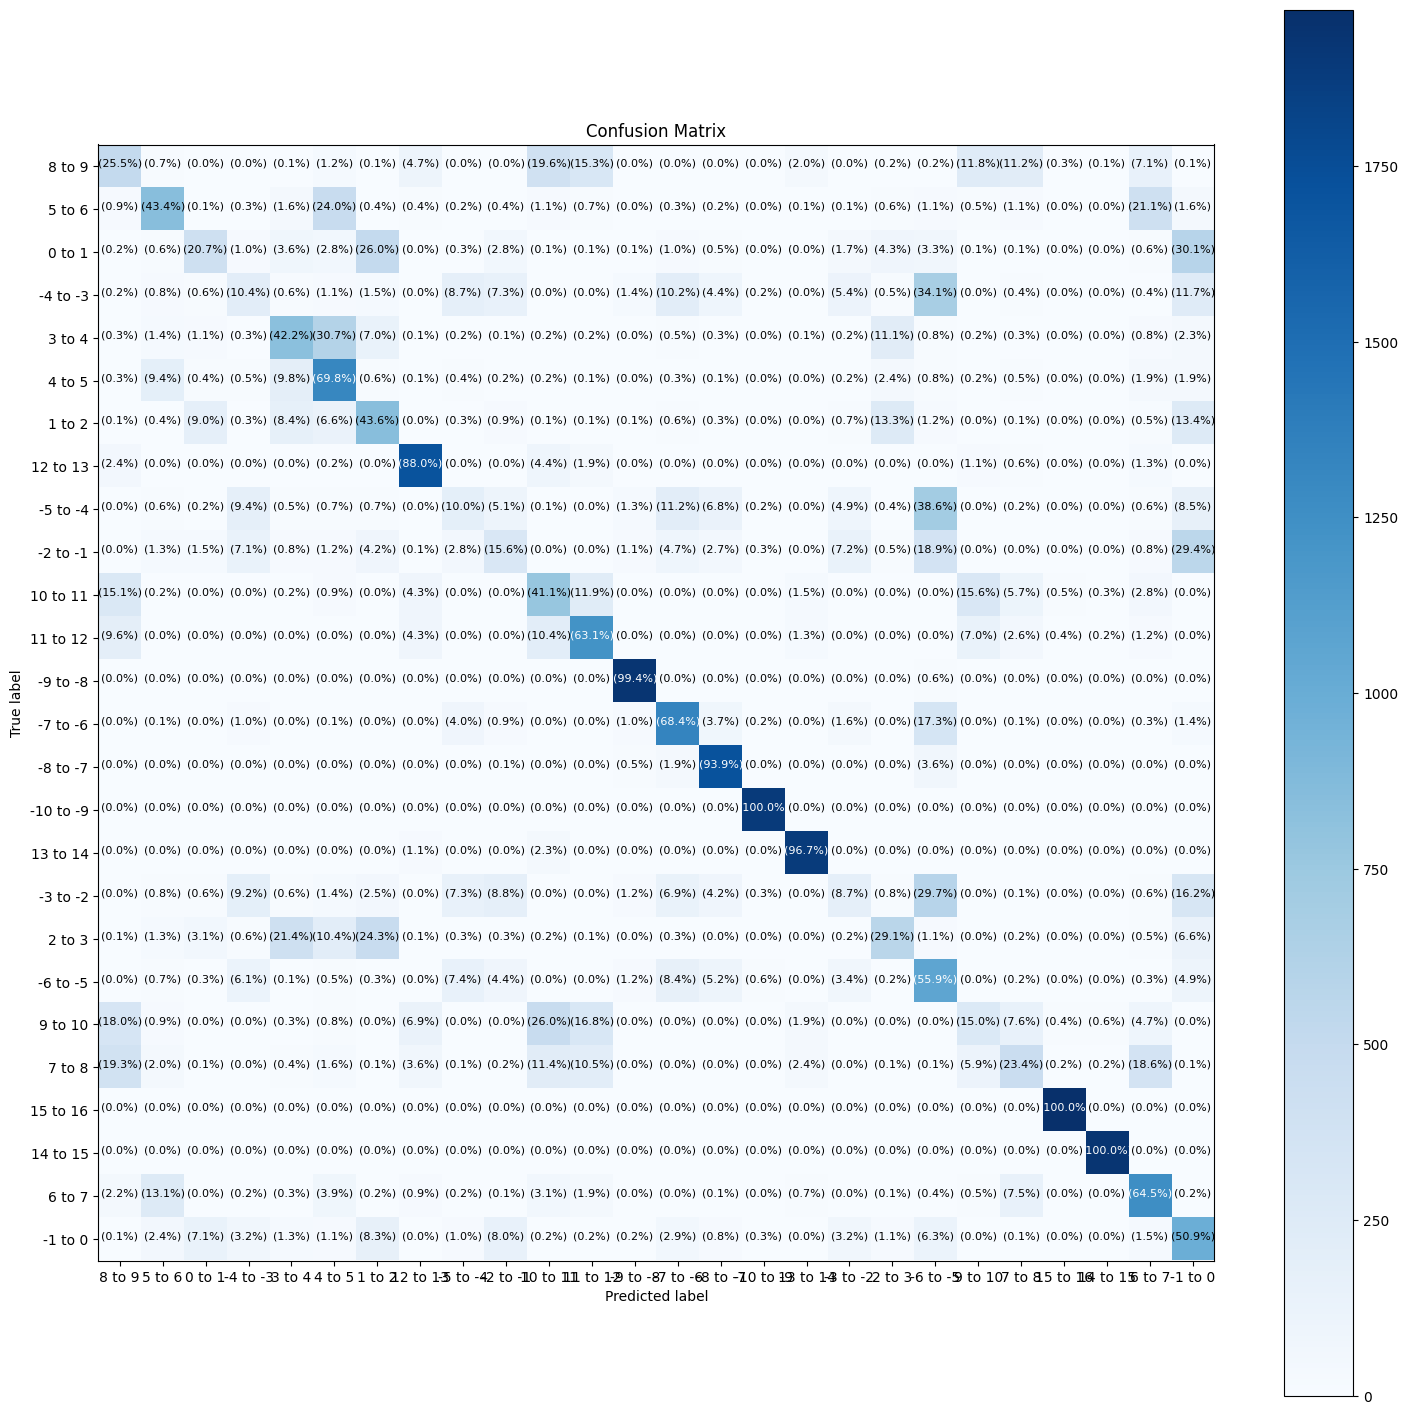

In [19]:
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=label_dict.values(),
                      figsize=(18, 18),
                      text_size=8)

In [ ]:
model.save('MODELS/model_8m_150K')